<a href="https://colab.research.google.com/github/Ramisa1231/DATATHON/blob/main/a1940784_Syeda_Ramisa_Fariha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Data Extraction**

The project uses features such as, genre, year, artists, album etc. of songs as data to generate a *music recommender system*. The first step to this is data extraction, which is the most time consuming step in building any machine learning model (Kotu and Deshpande
2019, p. 380). Here, Spotify API is used to extract meta data from a public playlist containing the training songs (Osinga 2018, pp. 202-205).

In [ ]:
pip install spotipy

In [ ]:
!pip install spotipy --upgrade -q

import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from IPython.display import clear_output

'''
The following code provides Spotify API access to a developer client with a CLIENT ID and CLIENT SECRET
(Osinga 2018, p.202)

'''

# --- Client Configuration ---
CLIENT_ID = "69507583638549e48a6819a6cadf819e"
CLIENT_SECRET = "4c7a2b02a8274ca3aa731ce0982a7664"
REDIRECT_URI = "https://example.com/callback"
SCOPE = "playlist-read-private playlist-read-collaborative"
CACHE = ".spotify_cache"

#  Authentication
sp_oauth = SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope=SCOPE,
    cache_path=CACHE,
    open_browser=False
)

auth_url = sp_oauth.get_authorize_url()
print("🔐 Please go to the following URL and log in to Spotify:")
print(auth_url)


redirect_response = input("\nPaste the full redirected URL here:\n")

# --- Extract the token ---
code = sp_oauth.parse_response_code(redirect_response)
token_info = sp_oauth.get_access_token(code, as_dict=True)

sp = spotipy.Spotify(auth=token_info['access_token'])
clear_output()
print("✅ Authenticated with Spotify!\n")


✅ Authenticated with Spotify!



In [ ]:
playlist_link = "https://open.spotify.com/playlist/1e6XZDkpYAcG5biMxtOnFc"
playlist_id = playlist_link.split("/")[-1].split("?")[0]

tracks = []
results = sp.playlist_items(playlist_id)
count = 0

while results:
    for item in results['items']:
        t = item['track']
        if t:
            metadata = {
                "Track Name": t['name'],
                "Artists": ", ".join([a['name'] for a in t['artists']]),
                "Album": t['album']['name'],
                "Duration_ms": t['duration_ms'],
                "Popularity": t.get("popularity"),
                "Release_Date": t['album'].get('release_date'),
                "Spotify_URL": t['external_urls']['spotify']
            }
            tracks.append(metadata)
            count += 1
            print(f"{count:03d}. {metadata['Track Name']} — {metadata['Artists']} [{metadata['Album']}]")
    if results.get("next"):
        results = sp.next(results)
    else:
        break

df = pd.DataFrame(tracks)
df.to_csv("spotify_playlist_metadata.csv", index=False)
print(f"\n📁 Saved metadata for {count} tracks to 'spotify_playlist_metadata.csv'")


001. Five Foot Two Eyes of Blue (1961 Single Version) — Alvin Stardust, Shane Fenton & The Fentones [The Early Years 1961 -1962 - The Shane Fenton And The Fentones Collection]
002. Roses Are Red - Original Version — Aqua [Aquarium (Special Edition)]
003. A Bicycle Built For Two — Donald Duck, Daisy Duck [Mickey Mouse Clubhouse]
004. Can't Help Falling in Love — Elvis Presley [Blue Hawaii]
005. Love Me Tender — Stereo Jane [Ready or Not (Original Motion Picture Soundtrack)]
006. Let Me Call You Sweetheart — Patti Page, The Sentimental Pops Orchestra [This Can't Be Love]
007. Danny Boy — Daniel O'Donnell [The Gold Collection]
008. When Irish Eyes Are Smiling — The Irish Tenors [The Very Best Of The Irish Tenors]
009. Puff, the Magic Dragon — Peter, Paul and Mary [Moving]
010. Autumn Leaves — Nat King Cole [Nat King Cole - Unforgettable]
011. By the Light of the Silvery Moon — Doris Day, Gordon MacRae [Day Time on the Radio: Lost Radio Duets From the Doris Day Show (1952-1953)]
012. Catch

In [ ]:
'''
The following code uses the metdata of artists and track ID of each song to fetch the genre of the artist.

'''
df['Artist_ID'] = df['Spotify_URL'].apply(lambda url: url.split("track/")[-1].split("?")[0])
# Actually, fetch from API:
def get_artist_id(track_id):
    try:
        data = sp.track(track_id)
        return data['artists'][0]['id']
    except Exception:
        return None

df['Artist_ID'] = df['Spotify_URL'].apply(lambda url: get_artist_id(
    url.split("track/")[-1].split("?")[0]
))


In [ ]:
genres = []

for artist_id in df['Artist_ID']:
    if artist_id:
        try:
            artist = sp.artist(artist_id)
            genres.append(", ".join(artist.get('genres', [])[:3]))
        except Exception:
            genres.append(None)
    else:
        genres.append(None)

df['Genres'] = genres


In [ ]:
df.to_csv("/content/spotify_playlist.csv", index=False)
print("✅ Saved enriched metadata with Genres 🎼 to '/content/spotify_playlist.csv'") #final feature file


✅ Saved enriched metadata with Genres 🎼 to '/content/spotify_playlist.csv'


In [ ]:
from google.colab import files
files.download("/content/spotify_playlist.csv") #final feature file download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **2. Data Cleaning**

Cleaning the data, in machine learning terms is called data wrangling which is defined as 'the process of transforming raw data to a clean and organized format ready for use' (Albon 2018, p. 33). Here, it is checked whether the data contains any null values or duplicate values

In [ ]:
# Creating a dataframe
data = pd.read_csv("/content/spotify_playlist.csv")
# View first two rows
data.head(2)

,Track Name,Artists,Album,Duration_ms,Popularity,Release_Date,Spotify_URL,Artist_ID,Genres
0,Five Foot Two Eyes of Blue (1961 Single Version),"Alvin Stardust, Shane Fenton & The Fentones",The Early Years 1961 -1962 - The Shane Fenton ...,130324,32,2016-07-12,https://open.spotify.com/track/6pZKKMikjRMNUfV...,2yoCXbhsq5CqLCnzDR7a7l,glam rock
1,Roses Are Red - Original Version,Aqua,Aquarium (Special Edition),225933,62,1997-01-01,https://open.spotify.com/track/0tIqERCyX2ogv5Y...,6kBjAFKyd0he7LiA5GQ3Gz,"europop, eurodance"


In [ ]:
# Checking the number of rows and columns in the data (Albon 2018, p. 36)
data.shape

(61, 9)

In [ ]:
data.dropna() # dropping rows with missing values (Albon 2018, p. 76)


,Track Name,Artists,Album,Duration_ms,Popularity,Release_Date,Spotify_URL,Artist_ID,Genres
0,Five Foot Two Eyes of Blue (1961 Single Version),"Alvin Stardust, Shane Fenton & The Fentones",The Early Years 1961 -1962 - The Shane Fenton ...,130324,32,2016-07-12,https://open.spotify.com/track/6pZKKMikjRMNUfV...,2yoCXbhsq5CqLCnzDR7a7l,glam rock
1,Roses Are Red - Original Version,Aqua,Aquarium (Special Edition),225933,62,1997-01-01,https://open.spotify.com/track/0tIqERCyX2ogv5Y...,6kBjAFKyd0he7LiA5GQ3Gz,"europop, eurodance"
3,Can't Help Falling in Love,Elvis Presley,Blue Hawaii,182360,83,1961-10-20,https://open.spotify.com/track/44AyOl4qVkzS48v...,43ZHCT0cAZBISjO8DG9PnE,"rockabilly, rock and roll"
5,Let Me Call You Sweetheart,"Patti Page, The Sentimental Pops Orchestra",This Can't Be Love,120853,30,2020-10-02,https://open.spotify.com/track/0BkkD2Rul7PLJtg...,4nZN9kln8toEzOifhWG2uF,adult standards
7,When Irish Eyes Are Smiling,The Irish Tenors,The Very Best Of The Irish Tenors,208000,28,2010-03-02,https://open.spotify.com/track/159kkICqBY6S6Ai...,2QehFI9eDvwgtDxEharMPu,celtic
8,"Puff, the Magic Dragon","Peter, Paul and Mary",Moving,206866,63,1963,https://open.spotify.com/track/3hqsBLMAqJqrhr4...,6yrBBtqX2gKCHCrZOYBDrB,"folk, folk rock"
9,Autumn Leaves,Nat King Cole,Nat King Cole - Unforgettable,161766,44,2011-11-15,https://open.spotify.com/track/4cBpmIjCDJ9k5o0...,7v4imS0moSyGdXyLgVTIV7,"christmas, adult standards, vocal jazz"
10,By the Light of the Silvery Moon,"Doris Day, Gordon MacRae",Day Time on the Radio: Lost Radio Duets From t...,105549,28,2017-06-02,https://open.spotify.com/track/58ITgStpXt72vk6...,3ESG6pj6a0LvUKklENalT6,"adult standards, big band"
11,Catch A Falling Star,Perry Como,Mob Hits III: Even More Music From The Great M...,148654,35,2005-11-01,https://open.spotify.com/track/6N1z0OZiXotykNx...,5v8jlSmAQfrkTjAlpUfWtu,"christmas, adult standards"
12,Changing Partners,Patti Page,Golden Hits,178640,35,1960-09-07,https://open.spotify.com/track/64ZGxABmrreTNE8...,4nZN9kln8toEzOifhWG2uF,adult standards


In [ ]:
data.drop_duplicates().head(2) # Dropping rows with duplicate values (Albon 2018, pp. 48-49)

,Track Name,Artists,Album,Duration_ms,Popularity,Release_Date,Spotify_URL,Artist_ID,Genres
0,Five Foot Two Eyes of Blue (1961 Single Version),"Alvin Stardust, Shane Fenton & The Fentones",The Early Years 1961 -1962 - The Shane Fenton ...,130324,32,2016-07-12,https://open.spotify.com/track/6pZKKMikjRMNUfV...,2yoCXbhsq5CqLCnzDR7a7l,glam rock
1,Roses Are Red - Original Version,Aqua,Aquarium (Special Edition),225933,62,1997-01-01,https://open.spotify.com/track/0tIqERCyX2ogv5Y...,6kBjAFKyd0he7LiA5GQ3Gz,"europop, eurodance"


# 3**. Data Visualization**

After getting rid of the null and duplicate values, the data is now visualized with bar charts, histograms etc for feature extraction. The categorical and numerical columns are analyzed separately.

In [ ]:
#Finding the numerical and categorical features
categorical_cols = data.select_dtypes(include='object').columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Track Name', 'Artists', 'Album', 'Release_Date', 'Spotify_URL', 'Artist_ID', 'Genres']
Numerical Columns: ['Duration_ms', 'Popularity']


Categorical Columns: ['Track Name', 'Artists', 'Album', 'Release_Date', 'Spotify_URL', 'Artist_ID', 'Genres']

Numerical Columns: ['Duration_ms', 'Popularity']

/tmp/ipython-input-16-1403538195.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  pyplot.tight_layout()


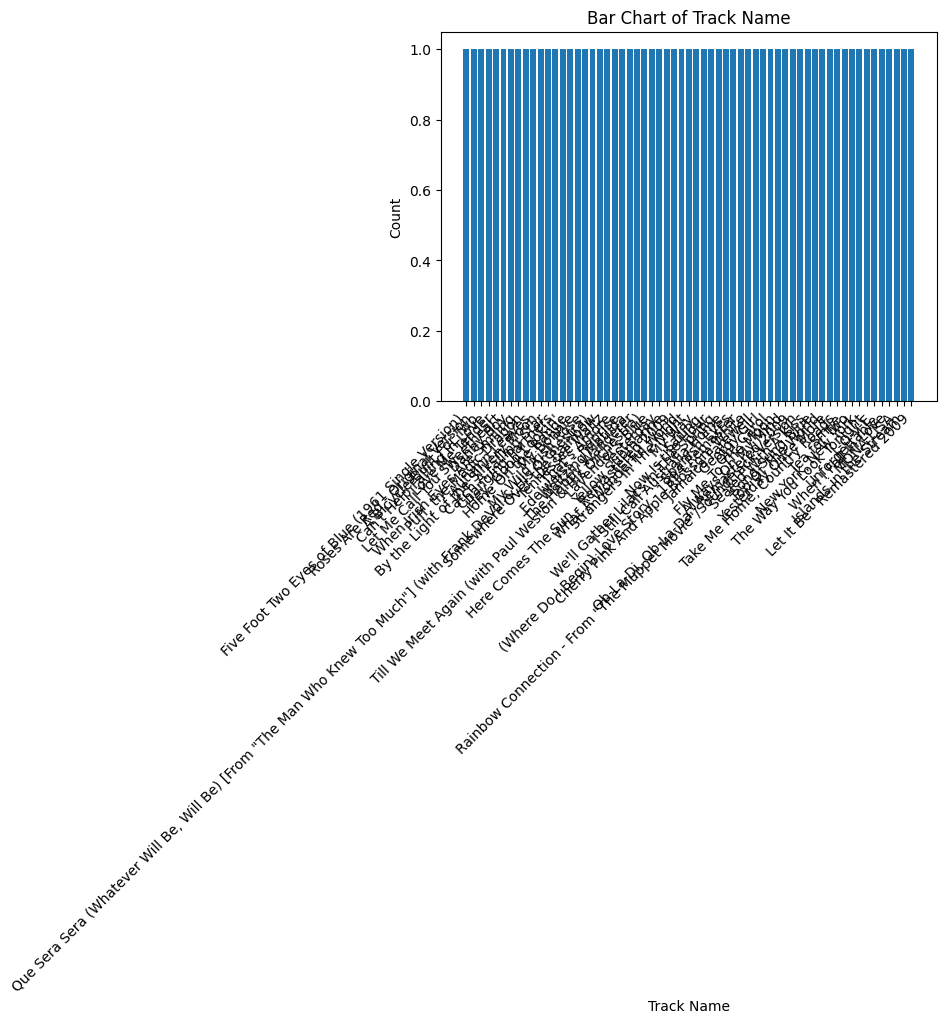

/tmp/ipython-input-16-1403538195.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  pyplot.tight_layout()


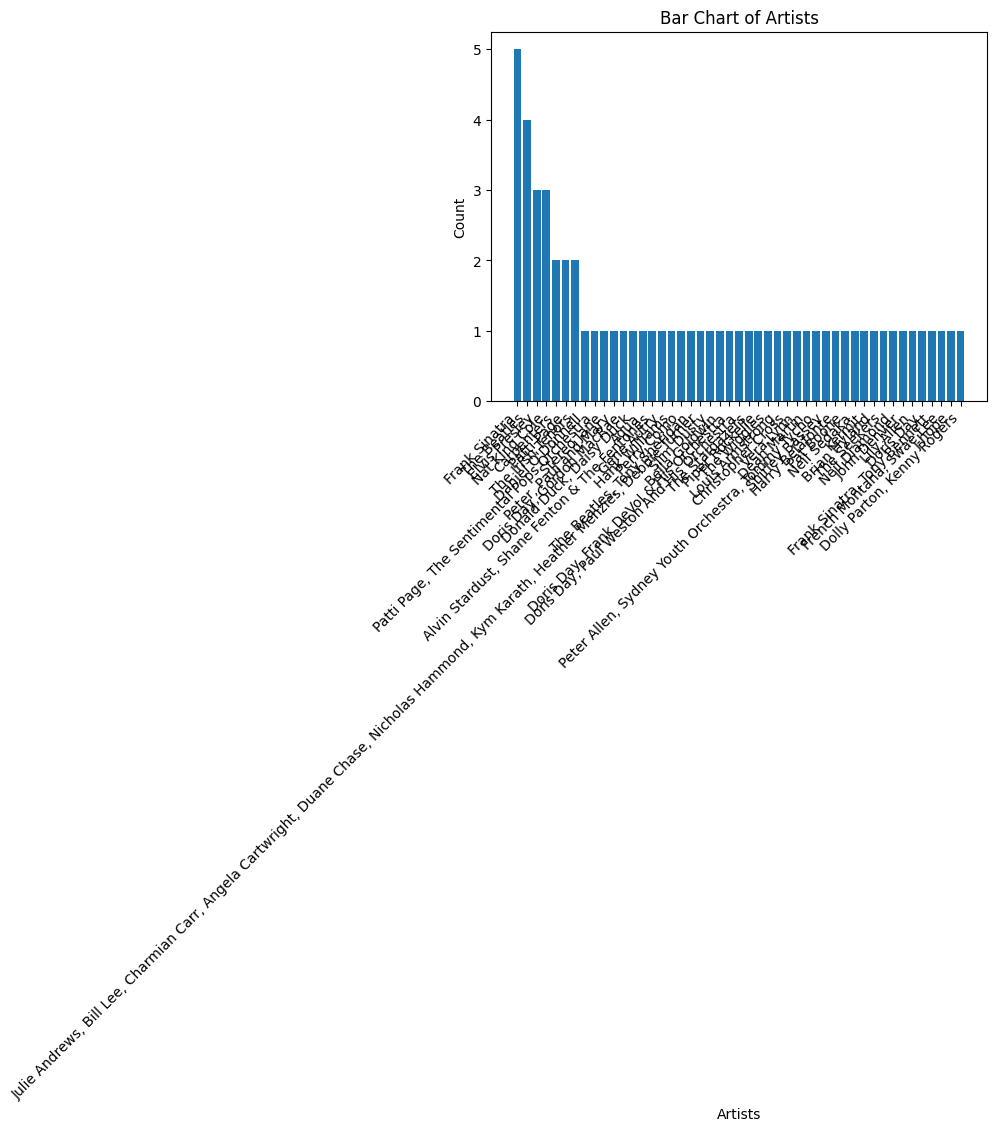

/tmp/ipython-input-16-1403538195.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  pyplot.tight_layout()


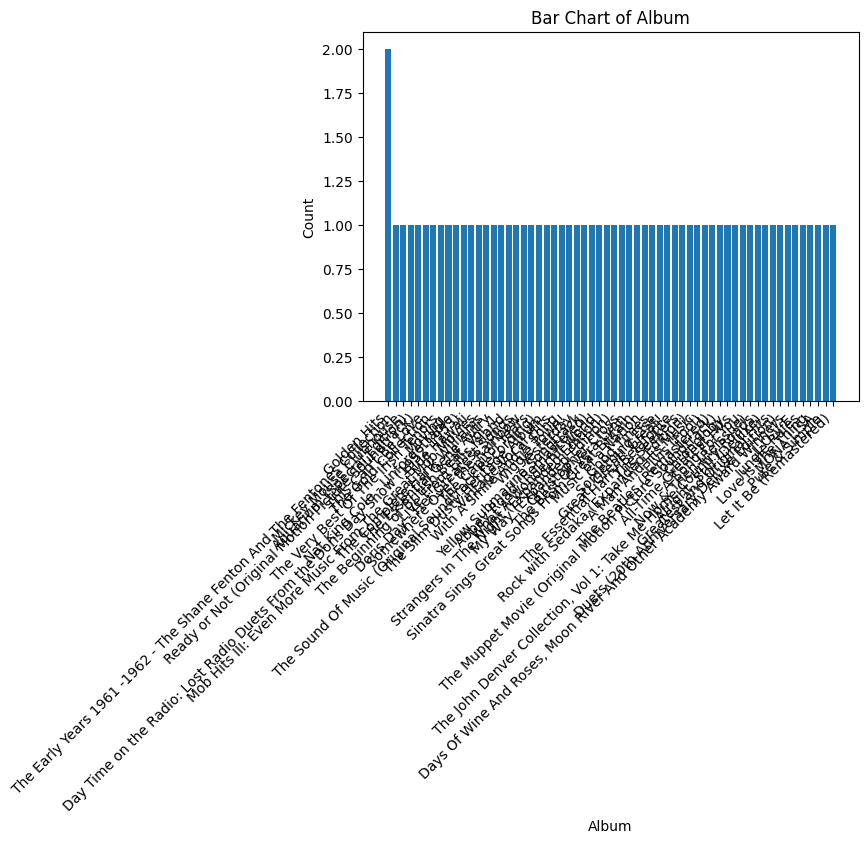

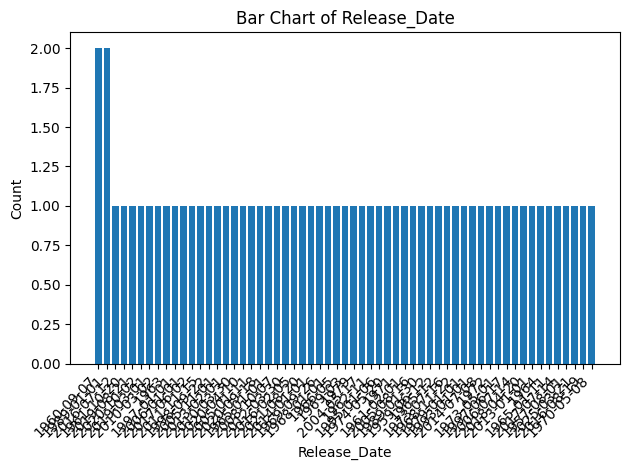

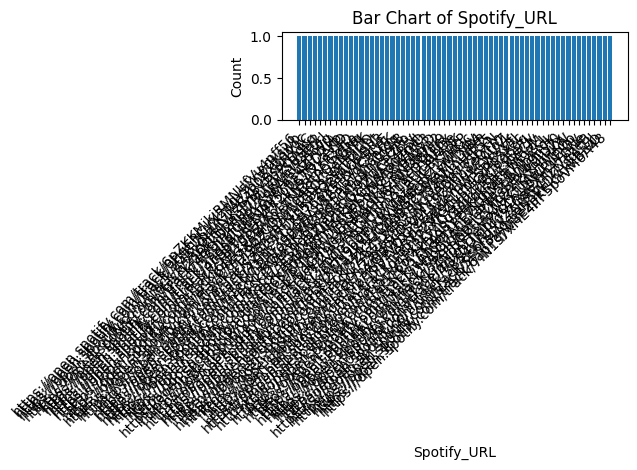

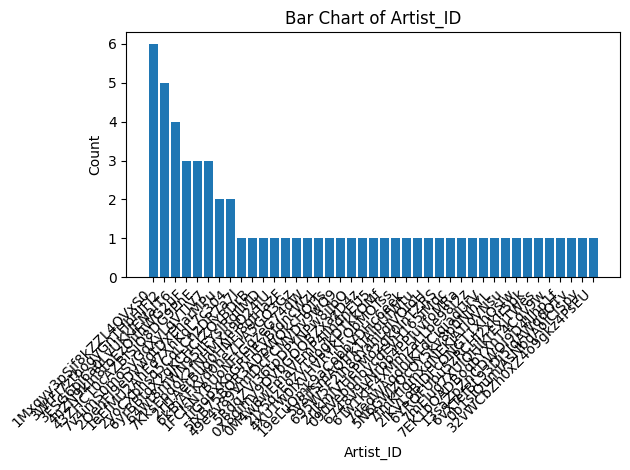

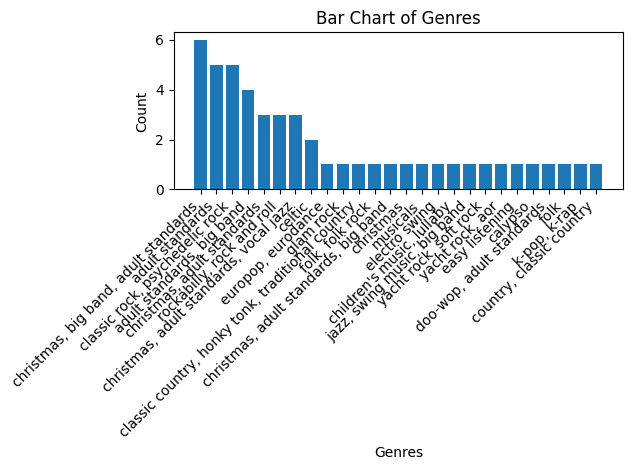

In [ ]:
# Bar charts for categorical columns (Hunt 2019b, pp. 54-55)



import matplotlib.pyplot as  pyplot

# Identify categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Create bar charts for categorical features
for feature in categorical_features:
    counts = data[feature].value_counts()
    labels = counts.index.tolist()
    sizes = counts.values.tolist()
    index = list(range(1, len(labels) + 1))  # x-axis positions

    # Plot bar chart
    pyplot.figure()
    pyplot.bar(index, sizes, tick_label=labels)
    pyplot.ylabel('Count')
    pyplot.xlabel(feature)
    pyplot.title(f'Bar Chart of {feature}')
    pyplot.xticks(rotation=45, ha='right')
    pyplot.tight_layout()
    pyplot.show()

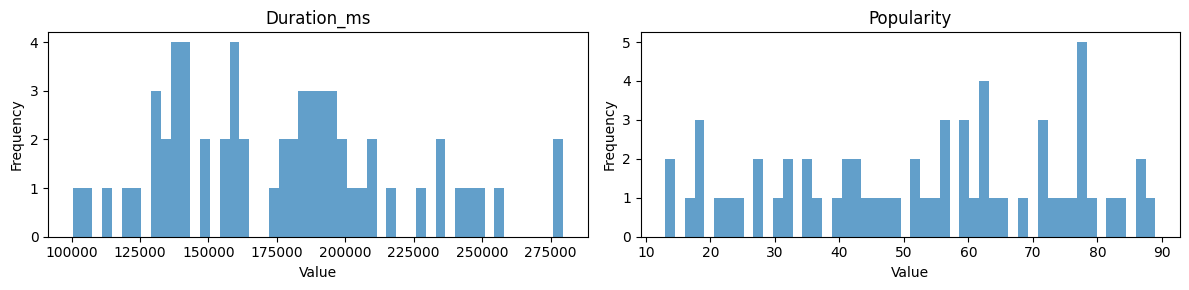

In [ ]:
# Histogram for numerical columns (Muller & Guido 2016, pp. 142-143)

import numpy as np
import matplotlib.pyplot as plt

# Identify numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Set up the subplots
n_features = len(numerical_features)
n_rows = (n_features + 1) // 2  # Calculate rows needed for 2 columns
fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 3))
axes = axes.ravel()  # Flatten the axes array for easy iteration

# Plot histograms
for i, feature in enumerate(numerical_features):
    axes[i].hist(data[feature].dropna(), bins=50, alpha=0.7)
    axes[i].set_title(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].set_xlabel("Value")

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
plt.show()


# **3. Data Preprocessing**

After data cleaning and visualization, data is now preprocessed for modeling. The categorical and numerical features are preprocessed separately. The categorical features include 'Track Name', 'Artists', 'Album', 'Release_Date', 'Spotify_URL', 'Artist_ID', 'Genres'. Among these, there are no *ordinal categorical* features, that is features that have some natural ordering in them(Albon 2018, p. 81). However, the *nominal categorical* features, that is features that have no natural ordering in them are  'Track Name', 'Artists', 'Album', 'Release_Date', 'Spotify_URL', 'Artist_ID', 'Genres' (Albon 2018, p. 81). Here, to preprocess the ordinal categorical features, techniques such as *one hot encoding* is used (Albon 2018, p. 84 - 86).

For preprocessing the numerical features ['Duration_ms', 'Popularity'], rescaling techniques like Min Max Scaling is used (Albon 2018, pp. 61 - 62)

**3.1 Handling Categorical Columns**


In [ ]:
categorical_cols = ['Track Name', 'Artists', 'Album', 'Release_Date', 'Spotify_URL', 'Artist_ID', 'Genres']
'''
The following code performs One-hot encoding of each categorical column using MultiLabelBinarizer (Albon 2018, p. 83)

'''
# Importing function MultiLabelBinarizer from package sklearn, module preprocessing (Hunt 2019a, pp. 286 - 287)
from sklearn.preprocessing import MultiLabelBinarizer
encoded_df = pd.DataFrame()
for col in categorical_cols:
    # Convert to list of tuples or lists (required by MultiLabelBinarizer)
    cleaned = df[col].fillna('').apply(lambda x: [i.strip() for i in str(x).split(',') if i.strip()])

    mlb = MultiLabelBinarizer()
    encoded = pd.DataFrame(mlb.fit_transform(cleaned), columns=[f"{col}_{cls}" for cls in mlb.classes_])
    encoded_df = pd.concat([encoded_df, encoded], axis=1)

# Join with the original DataFrame (excluding original categorical columns)
data_encoded = pd.concat([data.drop(columns=categorical_cols), encoded_df], axis=1)

In [ ]:
data_encoded.head(5)

,Duration_ms,Popularity,Track Name_(Where Do I Begin) Love Story - 1994 Remaster,Track Name_A Bicycle Built For Two,Track Name_Always On My Mind,Track Name_Autumn Leaves,Track Name_By the Light of the Silvery Moon,Track Name_Can't Help Falling in Love,Track Name_Catch A Falling Star,Track Name_Changing Partners,...,Genres_lullaby,Genres_musicals,Genres_psychedelic rock,Genres_rock and roll,Genres_rockabilly,Genres_soft rock,Genres_swing music,Genres_traditional country,Genres_vocal jazz,Genres_yacht rock
0,130324,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,225933,62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100400,46,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,182360,83,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,132693,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It can be seen that although the numerical columns are intact, the categorical columns are one hot encoded

**3.2 Handling Numerical Columns**

In [ ]:
# Importing function MinMaxScaler from package sklearn, module preprocessing (Hunt 2019a, pp. 286 - 287)
from sklearn.preprocessing import MinMaxScaler

# Select only numerical columns
numerical_cols =  ['Duration_ms', 'Popularity']

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform numerical columns
scaled_data = scaler.fit_transform(data_encoded[numerical_cols])

# Replace original numerical columns with scaled values
data_encoded[numerical_cols] = scaled_data

In [ ]:
data_encoded.head(5)

,Duration_ms,Popularity,Track Name_(Where Do I Begin) Love Story - 1994 Remaster,Track Name_A Bicycle Built For Two,Track Name_Always On My Mind,Track Name_Autumn Leaves,Track Name_By the Light of the Silvery Moon,Track Name_Can't Help Falling in Love,Track Name_Catch A Falling Star,Track Name_Changing Partners,...,Genres_lullaby,Genres_musicals,Genres_psychedelic rock,Genres_rock and roll,Genres_rockabilly,Genres_soft rock,Genres_swing music,Genres_traditional country,Genres_vocal jazz,Genres_yacht rock
0,0.167049,0.250000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.700781,0.644737,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.434211,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.457537,0.921053,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.180274,0.302632,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


It can be seen that the numerical columns are now scaled

Any modeling technique can only work with numerical data, therefore all data are now numeric (Albon 2018, p. 81)

In [ ]:
data_encoded.to_csv("/content/spotify_playlist_final.csv", index=False)
print("✅ Saved enriched metadata with Genres 🎼 to '/content/spotify_playlist_final.csv'")

✅ Saved enriched metadata with Genres 🎼 to '/content/spotify_playlist_final.csv'


# **4. Modeling**

In this project, content based recommendation system is used to preven pitfalls like, the *cold start problem*, where a new item with no prior history is introduced into the domain or the *popular bias problem*, where items recommended by most users are recommended to the individual user (Kotu and Deshpande 2019, p. 358). Furthermore, logistic regression, a popular classification technique is used to generate prediction for individual user using the scaled features, as the rating matrix here is unary (Aggarwal 2016, p. 150)

In [ ]:
columns_list = data_encoded.columns.tolist()
print(columns_list)

['Duration_ms', 'Popularity', 'Track Name_(Where Do I Begin) Love Story - 1994 Remaster', 'Track Name_A Bicycle Built For Two', 'Track Name_Always On My Mind', 'Track Name_Autumn Leaves', 'Track Name_By the Light of the Silvery Moon', "Track Name_Can't Help Falling in Love", 'Track Name_Catch A Falling Star', 'Track Name_Changing Partners', 'Track Name_Cherry Pink And Apple Blossom White', 'Track Name_Country Roads', 'Track Name_Danny Boy', 'Track Name_Edelweiss - Reprise', 'Track Name_Five Foot Two Eyes of Blue (1961 Single Version)', 'Track Name_Fly Me To The Moon', 'Track Name_Georgy Girl', "Track Name_Good Lookin'", 'Track Name_Here Comes The Sun - Remastered 2009', 'Track Name_Hey', 'Track Name_Home On the Range', 'Track Name_I Still Call Australia Home', 'Track Name_Islands in the Stream', 'Track Name_Jamaica Farewell', 'Track Name_L-O-V-E', "Track Name_Lavender's Blue", 'Track Name_Let It Be - Remastered 2009', 'Track Name_Let Me Call You Sweetheart', 'Track Name_Love Me Tender'

In [ ]:
'''

The following code uses logistic regression to generate an individual patient's prediction,
treating it as a classification problem (Rebala, Ravi and Churiwala 2019, pp. 70-73).

Furthermore, for evalution, precision, recall, f1 score and support is generated along with
the confusion matrix ( Albon 2018, pp. 186-195)


'''
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Simulate a binary 'Liked' label
np.random.seed(42)
data_encoded['Liked'] = np.random.choice([0, 1], size=len(data_encoded))

#  Define features and target
X = data_encoded.drop(columns=['Liked'])
y = data_encoded['Liked']

#  Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train logistic regression with class_weight="balanced" for imbalanced class (Albon 2018, p. 264)
model = LogisticRegression(random_state=0, class_weight="balanced",max_iter=1000)
model.fit(X_train, y_train)

#  Predict and evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#  Output results
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.60      0.43      0.50         7

    accuracy                           0.54        13
   macro avg       0.55      0.55      0.54        13
weighted avg       0.55      0.54      0.53        13

Confusion Matrix:
 [[4 2]
 [4 3]]


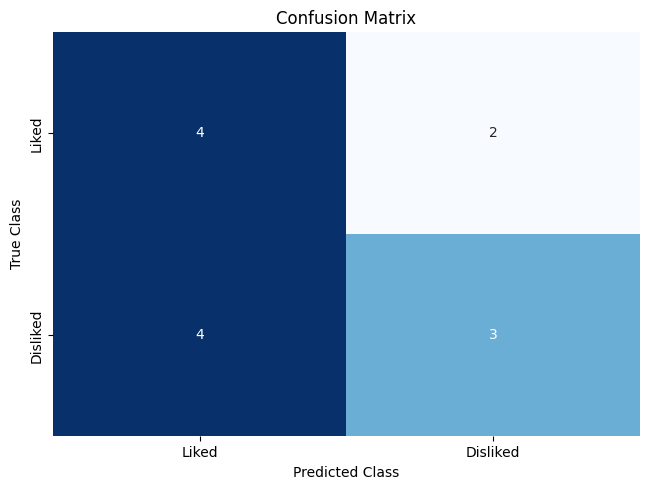

In [ ]:
'''
The following code  visualises the confusion matrix (Albon 2018, p. 194- 195)
'''
import seaborn as sns
# Create pandas dataframe
class_names = ['Liked', 'Disliked']
dataframe = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

The accuracy here is around 50 percent showing that the data is maybe, imbalanced/skewed (Albon 2018, pp. 92 - 93; Rebala, Ravi and Churiwala 2019, p. 60) . Furthermore, techniques such as *regularization or cross validation* can be used to improve results (Rebala, Ravi and Churiwala 2019, pp. 52 - 53)

Furthermore, the first column of the confusion matrix shows that out of 4 true *liked* predictions, the model was about to predict 4 predictions as *liked*, however, out of another 4 *disliked* predictions, the model incorrectly predicted each one of the 4 as *liked*, thereby generating an accuracy of 50% (Albon 2018, pp. 194 - 195)

# **5. References**

Aggarwal, CC 2016, *Recommender Systems*, Springer.

Albon, C 2018, *Machine Learning with Python Cookbook*, O’Reilly.

Hunt, J 2019a, 'A Beginner's Guide to Python 3 Programming', in I Mackie, S Abramsky, C Hankin, DC Kozen, A Pitts, HR Nielson, SS Skiena, I Stewart & M Hinchey (eds), *Undergraduate Topics in Computer Science*, Springer, Switzerland, pp. 1 - 497, DOI: https://doi.org/10.1007/978-3-030-25943-3.


Hunt, J 2019b, 'Advanced Guide to Python 3 Programming', in I Mackie, S Abramsky, C Hankin, DC Kozen, A Pitts, HR Nielson, SS Skiena, I Stewart & M Hinchey (eds), *Undergraduate Topics in Computer Science*, Springer, Switzerland, pp. 1 - 497, DOI: https://doi.org/10.1007/978-3-030-25943-3.

Kotu, V and B Deshpande 2019, *Data Science Concepts and Practice*, Morgan Kauffman.

Osinga, D 2018, *Deep Learning Cookbook*, O’Reilly.

Müller, AC & Guido, S 2016, *Introduction to Machine Learning with Python*, O'reilly, The USA.

Rebala, G, Ravi, A and Churiwala, S  2019, A*n Introduction to Machine Learning*, Springer, Switzerland, DOI: https://doi.org/10.1007/978-3-030-15729-6.
